In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
rpath = '/Users/dmartins/Dropbox/spine_modeling/clean_data/NSW007_1_data.h5'
df = pd.read_hdf(rpath, key='key')

In [ ]:
# calculate transtion probabilities
for col in [c for c in df.columns.values if 'spine_' in c]:
    df[col]

In [ ]:
df[['hrs','stage','spine_00']]

,hrs,stage,spine_00
0,0,P,filopodia
1,12,E,thin
2,24,E,stubby
3,36,E,stubby
4,48,M,stubby
5,60,D,stubby
6,72,D,mushroom
7,84,D,stubby
8,96,P,filopodia
9,108,P,mushroom


In [39]:
# calculate transition probability
def calculate_transition_matrix(sequence):
    """
    Calculates the transition matrix from a sequence of states.

    Args:
        sequence (list): A list representing the sequence of states.

    Returns:
        numpy.ndarray: The transition matrix.
    """
    # Get the unique states in the sequence
    states = list(set(sequence))
    num_states = len(states)

    # Initialize the transition matrix with zeros
    transition_matrix = np.zeros((num_states, num_states))

    # Populate the transition matrix
    for i in range(len(sequence) - 1):
        current_state_index = states.index(sequence[i])
        next_state_index = states.index(sequence[i + 1])
        transition_matrix[current_state_index, next_state_index] += 1

    # Normalize the rows to get probabilities
    for i in range(num_states):
        row_sum = np.sum(transition_matrix[i, :])
        if row_sum > 0:
            transition_matrix[i, :] /= row_sum

    return transition_matrix

# Example usage:
# state_sequence = ['A', 'B', 'C', 'A', 'B', 'C']
# transition_matrix = calculate_transition_matrix(state_sequence)
# print(transition_matrix)

In [ ]:
# calculate transition probability
def calculate_transition_matrix(sequence):
    
    # Get the unique states in the sequence
    states = list(set(sequence))
    num_states = len(states)

    # Initialize the transition matrix with zeros
    transition_matrix = np.zeros((num_states, num_states))

    # Populate the transition matrix
    for i in range(len(sequence) - 1):
        current_state_index = states.index(sequence[i])
        next_state_index = states.index(sequence[i + 1])
        transition_matrix[current_state_index, next_state_index] += 1

    # Normalize the rows to get probabilities
    for i in range(num_states):
        row_sum = np.sum(transition_matrix[i, :])
        if row_sum > 0:
            transition_matrix[i, :] /= row_sum

    return transition_matrix

# Example usage:
state_sequence = ['A', 'B', 'C', 'A', 'B', 'C']
transition_matrix = calculate_transition_matrix(state_sequence)
print(transition_matrix)

In [7]:
transition_matrix = calculate_transition_matrix(df['spine_00'])
transition_matrix

array([[0.        , 0.        , 0.5       , 0.5       ],
       [0.1       , 0.5       , 0.3       , 0.1       ],
       [0.        , 0.57142857, 0.42857143, 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ]])

In [40]:
def compute_transition_matrix(sequences):
    """
    Compute the normalized transition probability matrix from a list of state sequences.
    Supports string or hashable types for states.

    Parameters:
    sequences (list of list of hashable): A list where each element is a sequence of states.

    Returns:
    transition_matrix (np.ndarray): A 2D numpy array representing the transition probability matrix.
    state_to_index (dict): A dictionary mapping each state to its corresponding index in the matrix.
    """
    # Identify all unique states
    unique_states = sorted(set(state for seq in sequences for state in seq))
    state_to_index = {state: idx for idx, state in enumerate(unique_states)}
    num_states = len(unique_states)

    # Initialize transition count matrix
    transition_counts = np.zeros((num_states, num_states), dtype=np.float64)

    # Count transitions
    for seq in sequences:
        for (from_state, to_state) in zip(seq[:-1], seq[1:]):
            i = state_to_index[from_state]
            j = state_to_index[to_state]
            transition_counts[i, j] += 1

    # Normalize to get probabilities
    row_sums = transition_counts.sum(axis=1, keepdims=True)
    with np.errstate(divide='ignore', invalid='ignore'):
        transition_probabilities = np.divide(transition_counts, row_sums, where=row_sums != 0)
        transition_probabilities[np.isnan(transition_probabilities)] = 0.0

    return transition_probabilities, state_to_index


In [41]:
state_sequence_list = df[[col for col in df.columns.values if 'spine_' in col]].to_numpy().T.tolist()

In [42]:
state_transitions, state_key = compute_transition_matrix(state_sequence_list)

In [45]:
len(state_sequence_list)

49

In [46]:
len(state_sequence_list[0])

22

In [ ]:
df.shape
# 22 days, 51 spine on this dendrite of this mouse

(22, 51)

In [56]:
df

,spine_00,spine_01,spine_02,spine_03,spine_04,spine_05,spine_06,spine_07,spine_08,spine_09,...,spine_41,spine_42,spine_43,spine_44,spine_45,spine_46,spine_47,spine_48,hrs,stage
0,filopodia,stubby,stubby,stubby,stubby,stubby,stubby,thin,thin,stubby,...,NS,NS,NS,NS,NS,NS,stubby,NS,0,P
1,thin,stubby,mushroom,thin,stubby,stubby,stubby,NS,stubby,thin,...,stubby,stubby,stubby,NS,NS,NS,NS,NS,12,E
2,stubby,thin,stubby,NS,stubby,stubby,stubby,NS,thin,stubby,...,stubby,NS,stubby,NS,mushroom,NS,NS,NS,24,E
3,stubby,stubby,NS,stubby,stubby,stubby,stubby,NS,thin,thin,...,NS,stubby,stubby,NS,filopodium,NS,NS,NS,36,E
4,stubby,thin,mushroom,thin,stubby,stubby,stubby,NS,thin,stubby,...,NS,thin,thin,NS,mushroom,NS,NS,NS,48,M
5,stubby,stubby,stubby,stubby,thin,stubby,stubby,NS,NS,thin,...,NS,mushroom,stubby,NS,mushroom,NS,thin,stubby,60,D
6,mushroom,thin,stubby,stubby,stubby,NS,stubby,NS,NS,NS,...,NS,NS,filopodia,NS,mushroom,NS,filopodia,NS,72,D
7,stubby,mushroom,stubby,stubby,stubby,stubby,stubby,NS,stubby,stubby,...,NS,thin,mushroom,NS,mushroom,stubby,stubby,NS,84,D
8,filopodia,stubby,NS,stubby,stubby,stubby,stubby,NS,stubby,stubby,...,stubby,thin,stubby,NS,filopodium,NS,stubby,NS,96,P
9,mushroom,stubby,stubby,NS,stubby,NS,stubby,NS,stubby,mushroom,...,stubby,mushroom,stubby,NS,stubby,stubby,stubby,NS,108,P


In [43]:
state_transitions

array([[0.56268222, 0.00291545, 0.        , 0.04956268, 0.26239067,
        0.12244898],
       [0.        , 0.        , 0.        , 0.2       , 0.4       ,
        0.4       ],
       [0.07692308, 0.        , 0.        , 0.46153846, 0.15384615,
        0.30769231],
       [0.19512195, 0.        , 0.03658537, 0.2195122 , 0.37804878,
        0.17073171],
       [0.20902613, 0.01425178, 0.00475059, 0.06650831, 0.55819477,
        0.14726841],
       [0.23125   , 0.025     , 0.05      , 0.10625   , 0.38125   ,
        0.20625   ]])

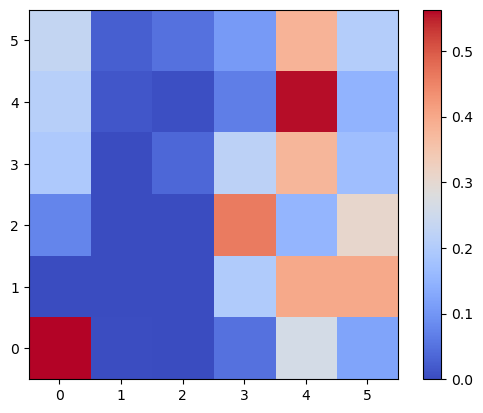

In [54]:
plt.imshow(state_transitions, cmap='coolwarm', origin='lower')
plt.colorbar()

In [33]:
state_key

{'NS': 0,
 'filopodia': 1,
 'filopodium': 2,
 'mushroom': 3,
 'stubby': 4,
 'thin': 5}

In [61]:
tranmat = pd.read_csv('/Users/dmartins/Dropbox/spine_modeling/transition_matrix.csv', index_col=0)

In [62]:
tranmat

,mushroom,stubby,filopodium,thin,NS
mushroom,0.432099,0.213992,0.032922,0.230453,0.090535
stubby,0.125000,0.546642,0.007463,0.166045,0.154851
filopodium,0.121212,0.181818,0.090909,0.393939,0.212121
thin,0.118881,0.265734,0.055944,0.440559,0.118881
NS,0.058544,0.221519,0.026899,0.175633,0.517405


In [71]:
tranmat = tranmat[['NS','filopodium','thin','stubby','mushroom']]
tranmat = tranmat.reindex(['NS','filopodium','thin','stubby','mushroom'])

In [80]:
tranmat

,NS,filopodium,thin,stubby,mushroom
NS,0.517405,0.026899,0.175633,0.221519,0.058544
filopodium,0.212121,0.090909,0.393939,0.181818,0.121212
thin,0.118881,0.055944,0.440559,0.265734,0.118881
stubby,0.154851,0.007463,0.166045,0.546642,0.125000
mushroom,0.090535,0.032922,0.230453,0.213992,0.432099


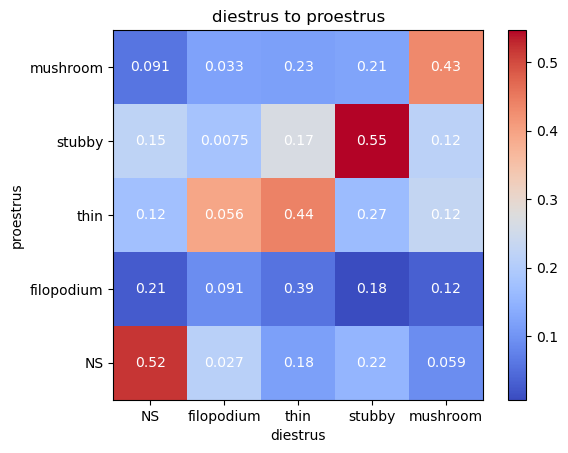

In [86]:
plt.imshow(tranmat.T, cmap='coolwarm')
plt.ylim([-0.5,4.5])
plt.xticks(range(5), labels=['NS','filopodium','thin','stubby','mushroom'])
plt.yticks(range(5), labels=['NS','filopodium','thin','stubby','mushroom'])
plt.xlabel('diestrus')
plt.ylabel('proestrus')
plt.title('diestrus to proestrus')
for i in range(tranmat.shape[0]):
    for j in range(tranmat.shape[1]):
        text = plt.text(j, i, '{:.2}'.format(tranmat.iloc[i, j]), ha="center", va="center", color="w")
plt.colorbar()